<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.282229,51.227421,-383.344390,-282.834740,-14.223462,-268.611278
1,0.0,1.0,58.745595,91.747301,-135.168558,25.324339,669.622587,-644.298248
2,0.0,2.0,64.204281,21.202383,-133.494168,-38.087505,-393.272051,355.184546
3,0.0,3.0,92.286992,73.399008,251.501453,427.187452,497.409709,-70.222256
4,0.0,4.0,42.459631,93.820753,717.952620,864.233005,648.533437,215.699567
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.911510,58.257274,-1640.259568,-1493.090783,375.373898,-1868.464682
19996,999.0,16.0,70.149228,40.743256,-295.483298,-174.590814,212.299681,-386.890495
19997,999.0,17.0,96.836941,53.438658,736.098006,896.373605,503.076552,393.297053
19998,999.0,18.0,51.262259,67.071009,-1315.452376,-1187.119108,185.394415,-1372.513523


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    39.282229  51.227421  -383.344390  -282.834740  -14.223462   
      1.0    58.745595  91.747301  -135.168558    25.324339  669.622587   
      2.0    64.204281  21.202383  -133.494168   -38.087505 -393.272051   
      3.0    92.286992  73.399008   251.501453   427.187452  497.409709   
      4.0    42.459631  93.820753   717.952620   864.233005  648.533437   
...                ...        ...          ...          ...         ...   
999.0 15.0   78.911510  58.257274 -1640.259568 -1493.090783  375.373898   
      16.0   70.149228  40.743256  -295.483298  -174.590814  212.299681   
      17.0   96.836941  53.438658   736.098006   896.373605  503.076552   
      18.0   51.262259  67.071009 -1315.452376 -1187.119108  185.394415   
      19.0   85.511549  40.870740   274.214107   410.596396  343.307258   

                   e_hat  
rep   index               
0.0   0.0    -268.611278  
      1.0    -644.298248  
      2.0     355.184546  
      3.0     -70.222256  
      4.0     215.699567  
...                  ...  
999.0 15.0  -1868.464682  
      16.0   -386.890495  
      17.0    393.297053  
      18.0  -1372.513523  
      19.0     67.289138  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    39.282229  51.227421  -383.344390  -282.834740  -14.223462   
      1.0    58.745595  91.747301  -135.168558    25.324339  669.622587   
      2.0    64.204281  21.202383  -133.494168   -38.087505 -393.272051   
      3.0    92.286992  73.399008   251.501453   427.187452  497.409709   
      4.0    42.459631  93.820753   717.952620   864.233005  648.533437   
...                ...        ...          ...          ...         ...   
999.0 15.0   78.911510  58.257274 -1640.259568 -1493.090783  375.373898   
      16.0   70.149228  40.743256  -295.483298  -174.590814  212.299681   
      17.0   96.836941  53.438658   736.098006   896.373605  503.076552   
      18.0   51.262259  67.071009 -1315.452376 -1187.119108  185.394415   
      19.0   85.511549  40.870740   274.214107   410.596396  343.307258   

                   e_hat  
rep   index               
0.0   0.0    -268.611278  
      1.0    -644.298248  
      2.0     355.184546  
      3.0     -70.222256  
      4.0     215.699567  
...                  ...  
999.0 15.0  -1868.464682  
      16.0   -386.890495  
      17.0    393.297053  
      18.0  -1372.513523  
      19.0     67.289138  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.282229,51.227421,-383.344390,-282.834740,-14.223462,-268.611278
1,0.0,1.0,58.745595,91.747301,-135.168558,25.324339,669.622587,-644.298248
2,0.0,2.0,64.204281,21.202383,-133.494168,-38.087505,-393.272051,355.184546
3,0.0,3.0,92.286992,73.399008,251.501453,427.187452,497.409709,-70.222256
4,0.0,4.0,42.459631,93.820753,717.952620,864.233005,648.533437,215.699567
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.911510,58.257274,-1640.259568,-1493.090783,375.373898,-1868.464682
19996,999.0,16.0,70.149228,40.743256,-295.483298,-174.590814,212.299681,-386.890495
19997,999.0,17.0,96.836941,53.438658,736.098006,896.373605,503.076552,393.297053
19998,999.0,18.0,51.262259,67.071009,-1315.452376,-1187.119108,185.394415,-1372.513523


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    39.282229  51.227421  -383.344390  -282.834740  -14.223462   
      1.0    58.745595  91.747301  -135.168558    25.324339  669.622587   
      2.0    64.204281  21.202383  -133.494168   -38.087505 -393.272051   
      3.0    92.286992  73.399008   251.501453   427.187452  497.409709   
      4.0    42.459631  93.820753   717.952620   864.233005  648.533437   
...                ...        ...          ...          ...         ...   
999.0 15.0   78.911510  58.257274 -1640.259568 -1493.090783  375.373898   
      16.0   70.149228  40.743256  -295.483298  -174.590814  212.299681   
      17.0   96.836941  53.438658   736.098006   896.373605  503.076552   
      18.0   51.262259  67.071009 -1315.452376 -1187.119108  185.394415   
      19.0   85.511549  40.870740   274.214107   410.596396  343.307258   

                   e_hat  
rep   index               
0.0   0.0    -268.611278  
      1.0    -644.298248  
      2.0     355.184546  
      3.0     -70.222256  
      4.0     215.699567  
...                  ...  
999.0 15.0  -1868.464682  
      16.0   -386.890495  
      17.0    393.297053  
      18.0  -1372.513523  
      19.0     67.289138  

[20000 rows x 6 columns]

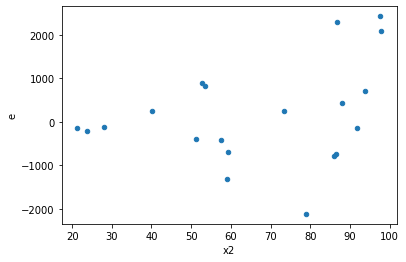

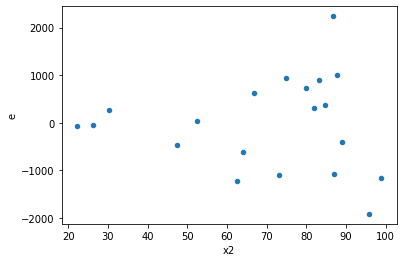

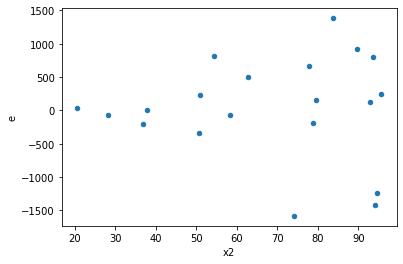

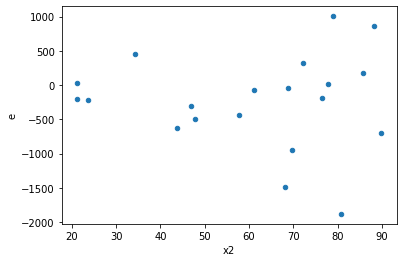

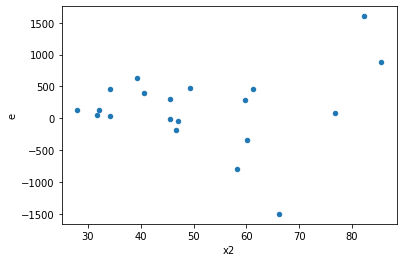

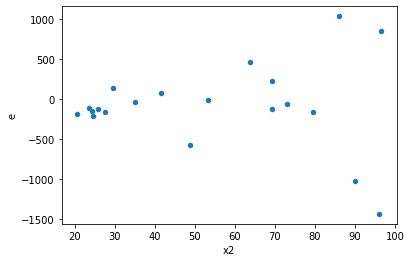

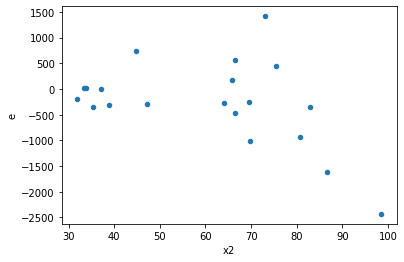

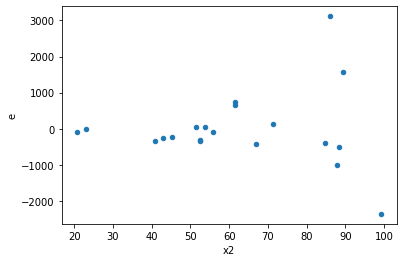

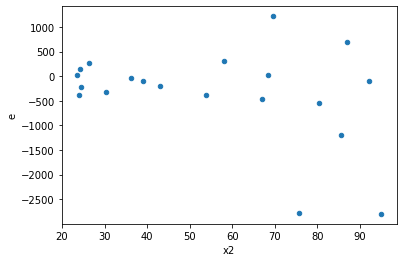

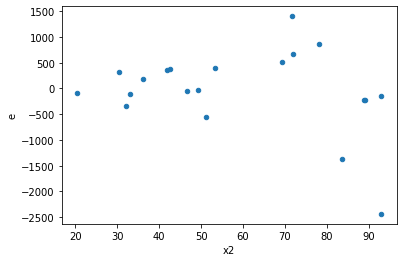

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,3670416.548970475,12532245.804627478,458802.06862130936,1566530.7255784348,3.4143933358579375,0.10181230873577318,0.9490938456321134,0.05090615436788659,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,3855867.2389584524,4903753.83924409,550838.1769940646,544861.5376937878,0.9891499181612803,0.9877666853212226,0.5061166573393887,0.4938833426606113,Reject001=1 : Homoscedasticity
4.0,9.0,7.0,309254.1319167736,4703123.264319537,34361.570212974846,671874.7520456482,19.55308642420392,0.0007341748983287211,0.9996329125508356,0.00036708744916436054,Reject001=0 : Heteroscedasticity
8.0,9.0,7.0,434658.92578824767,13421541.852145487,48295.43619869419,1917363.1217350697,39.70071030825292,6.950504270397673e-05,0.999965247478648,3.4752521351988364e-05,Reject001=0 : Heteroscedasticity
11.0,6.0,10.0,73567.41591294303,20982808.79973835,12261.235985490506,2098280.8799738353,171.13126951123553,3.449780683340009e-09,0.9999999982751097,1.7248903416700045e-09,Reject001=0 : Heteroscedasticity
12.0,9.0,7.0,2795567.447434997,2261738.7800520174,310618.60527055524,323105.54000743106,1.0402002150708243,0.9813432528798871,0.5093283735600564,0.49067162643994355,Reject001=1 : Homoscedasticity
13.0,6.0,10.0,2719119.611339134,4758231.554173057,453186.6018898557,475823.1554173057,1.0499497413053525,0.8992546866334759,0.5503726566832621,0.4496273433167379,Reject001=1 : Homoscedasticity
15.0,11.0,5.0,255980.79278497616,10282598.747097401,23270.98116227056,2056519.74941948,88.3727134270442,0.00010677089804533857,0.9999466145509773,5.3385449022669285e-05,Reject001=0 : Heteroscedasticity
16.0,9.0,7.0,522571.67268240504,10400641.73173367,58063.519186933896,1485805.9616762386,25.589319808410636,0.00030284651095091597,0.9998485767445245,0.00015142325547545799,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,3670416.548970475,12532245.804627478,458802.06862130936,1566530.7255784348,3.4143933358579375,0.10181230873577318,Reject001=1 : Homoscedasticity
1.0,9.0,7.0,13491264.958401969,4148458.906190624,1499029.439822441,592636.9865986606,0.39534712985280535,0.19552416771773384,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,3855867.2389584524,4903753.83924409,550838.1769940646,544861.5376937878,0.9891499181612803,0.9877666853212226,Reject001=1 : Homoscedasticity
3.0,10.0,6.0,6624860.630198951,2210081.061179064,662486.0630198951,368346.843529844,0.5560069322073907,0.39309206380484313,Reject001=1 : Homoscedasticity
4.0,9.0,7.0,309254.1319167736,4703123.264319537,34361.570212974846,671874.7520456482,19.55308642420392,0.0007341748983287211,Reject001=0 : Heteroscedasticity
5.0,7.0,9.0,5373481.5041092,119973.67667748663,767640.2148727429,13330.408519720737,0.01736543795055163,1.9626693030588366e-05,Reject001=0 : Heteroscedasticity
6.0,10.0,6.0,5673439.669132436,423083.17440404184,567343.9669132435,70513.86240067364,0.12428767469639171,0.004593473601343688,Reject001=0 : Heteroscedasticity
7.0,9.0,7.0,13463466.061152104,3777170.641694228,1495940.673461345,539595.8059563183,0.36070668812539736,0.15645909415731454,Reject001=1 : Homoscedasticity
8.0,9.0,7.0,434658.92578824767,13421541.852145487,48295.43619869419,1917363.1217350697,39.70071030825292,6.950504270397673e-05,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      674
Reject001=0 : Heteroscedasticity    326
Name: Result_test, dtype: int64